In [7]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [8]:
import pandas as pd
import glob

In [9]:
# 1. 모든 parquet 파일 경로 가져오기
file_list = glob.glob('open/test/1.회원정보/2018*_test_회원정보.parquet')

# 2. 데이터프레임 리스트 생성
df_list = [pd.read_parquet(f) for f in file_list]

# 3. 하나로 합치기
all_df = pd.concat(df_list, ignore_index=True)

# 4. 확인
print(all_df.shape)
all_df.head(10)

(600000, 77)


,기준년월,ID,남녀구분코드,연령,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TEST_00000,1,40대,1,1,0,1,2,2,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),45
1,201807,TEST_00001,1,60대,1,1,0,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀독립기,19
2,201807,TEST_00002,1,40대,1,1,1,1,2,2,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),5
3,201807,TEST_00003,2,40대,1,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),7
4,201807,TEST_00004,2,40대,1,0,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),1
5,201807,TEST_00005,2,30대,0,0,0,1,1,0,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),19
6,201807,TEST_00006,1,30대,1,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,가족구축기,24
7,201807,TEST_00007,1,50대,1,1,1,1,2,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),3
8,201807,TEST_00008,1,40대,1,0,0,1,2,2,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),19
9,201807,TEST_00009,2,40대,1,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),23


In [10]:
# 컬럼명 확인
all_df.columns

Index(['기준년월', 'ID', '남녀구분코드', '연령', '회원여부_이용가능', '회원여부_이용가능_CA',
       '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용',
       '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM',
       '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부',
       '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족',
       '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크',
       '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크',
       '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족',
       '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수',
       '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분',
       '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인',
       '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인',
       '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M',
       '연회비할

In [5]:
# 결측치 확인
all_df.isna().sum()

기준년월             0
ID               0
남녀구분코드           0
연령               0
회원여부_이용가능        0
                ..
우수회원면제카드수_B0M    0
기타면제카드수_B0M      0
카드신청건수           0
Life_Stage       0
최종카드발급경과월        0
Length: 77, dtype: int64

In [6]:
# 결측치가 하나라도 있는 컬럼 이름만 보기
all_df.columns[all_df.isna().any()]

Index(['가입통신회사코드', '직장시도명', '_1순위신용체크구분', '_2순위신용체크구분', '최종유효년월_신용_이용가능',
       '최종유효년월_신용_이용', '최종카드발급일자'],
      dtype='object')

### 데이터 명세서

- 기준년월
- ID
- 남녀구분코드
- 연령
  -  1 = 여성 / 2 = 남성
- 회원여부_이용가능
- 회원여부_이용가능_CA
- 회원여부_이용가능_카드론
- 소지여부_신용
- 소지카드수_유효_신용
- 소지카드수_이용가능_신용

### 기준년월
- 데이터 기준년월
- int64, 범주형 데이터


In [8]:
# 남녀구분코드 분포
all_df['기준년월'].value_counts()

기준년월
201807    100000
201808    100000
201809    100000
201810    100000
201811    100000
201812    100000
Name: count, dtype: int64

### ID 
- 고유 ID
- object
- 같은 고객(40만명)이 6달 동안 반복적으로 기록된 데이터... 

In [10]:
df_august = all_df[all_df['기준년월'] == 201808]
df_august.head()

,기준년월,ID,남녀구분코드,연령,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
100000,201808,TEST_00000,1,40대,1,1,0,1,2,2,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),46
100001,201808,TEST_00001,1,60대,1,1,0,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀독립기,20
100002,201808,TEST_00002,1,40대,1,1,1,1,2,2,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),6
100003,201808,TEST_00003,2,40대,1,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),8
100004,201808,TEST_00004,2,40대,1,0,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),2


In [11]:
# 총 ID 수 (전체 행 수)
len(all_df)

600000

In [12]:
# 고유한 고객 수
all_df['ID'].nunique()

100000

### 남녀구분코드
- 범주형 데이터, int64
- 1 / 2 로 구분되어있음.
- 1 : 남성
- 2 : 여성

In [14]:
# 남녀구분코드 분포
all_df['남녀구분코드'].value_counts()


남녀구분코드
1    314316
2    285684
Name: count, dtype: int64

### 연령
- 나이
- 범주형 데이터
- 20대, 30대, ..., 60대, 70대 이상

In [16]:
# 연령 분포
all_df['연령'].value_counts()

연령
40대      183816
30대      148890
50대      135600
60대       62124
20대       47028
70대이상     22542
Name: count, dtype: int64

### 회원여부_이용가능
- 분실/연체/한도 소진 등으로 Black List로 등재 되지 않은 회원
- 0 / 1 로 구분되어 있음
- 보통 관례적으로 1 = 이용가능, 0 = 이용불가

In [18]:
# 회원여부_이용가능 분포
all_df['회원여부_이용가능'].value_counts()

회원여부_이용가능
1    571083
0     28917
Name: count, dtype: int64

### 회원여부_이용가능_CA
- 분실/연체/한도 소진 등으로 Black List로 등재 되지 않아 현금서비스 
- 0 / 1 로 구분되어 있음
- 보통 관례적으로 1 = 이용가능, 0 = 이용불가

In [20]:
# 회원여부_이용가능_CA 분포
all_df['회원여부_이용가능_CA'].value_counts()

회원여부_이용가능_CA
1    527252
0     72748
Name: count, dtype: int64

### 회원여부_이용가능_카드론
- 분실/연체/한도 소진 등으로 Black List로 등재 되지 않아 카드장기대출
- 0 / 1 로 구분되어 있음
- 보통 관례적으로 1 = 이용가능, 0 = 이용불가

In [22]:
# 회원여부_이용가능_카드론 분포
all_df['회원여부_이용가능_카드론'].value_counts()

회원여부_이용가능_카드론
1    372122
0    227878
Name: count, dtype: int64

### 소지여부_신용
- 신용카드를 소지한 회원
- 0 / 1 로 구분되어 있음
- 1 = 있음, 0 = 없음

In [24]:
# 소지여부_분포
all_df['소지여부_신용'].value_counts()

소지여부_신용
1    589159
0     10841
Name: count, dtype: int64

### 소지카드수_유효_신용
- 유효한 신용카드의 보유 수
- 보유 카드 수 : 0, 1, 2, 3, 4장

In [26]:
# 소지카드수_유효_신용
all_df['소지카드수_유효_신용'].value_counts()

소지카드수_유효_신용
1    461086
2     98098
3     29948
0     10849
4        19
Name: count, dtype: int64

<Axes: ylabel='count'>

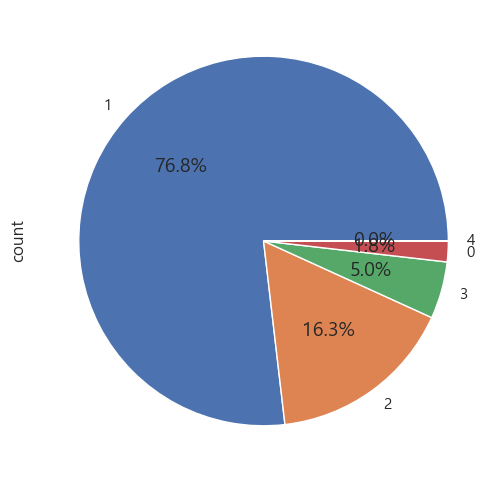

In [27]:
all_df['소지카드수_유효_신용'].value_counts().plot.pie(autopct='%.1f%%')

### 소지카드수_이용가능_신용
- 유요한 신용카드 중 BL로 등재되지 않아 이용 가능한 신용카드 수
- 이용가능 소지카드 수 : 0, 1, 2, 3장

In [29]:
# 소지카드수_이용가능_신용
all_df['소지카드수_이용가능_신용'].value_counts()

소지카드수_이용가능_신용
1    430542
2     92595
0     51910
3     24953
Name: count, dtype: int64

<Axes: ylabel='count'>

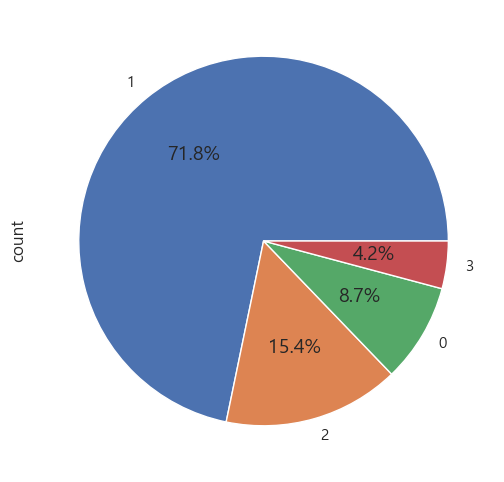

In [30]:
all_df['소지카드수_이용가능_신용'].value_counts().plot.pie(autopct='%.1f%%')

### 입회일자_신용
- 카드회원이 된 일자 (입회일자의 일단위 두자리는 01로 변경하여 월단위로 범주화)


In [32]:
# 입회일자_신용
all_df['입회일자_신용'].value_counts()

입회일자_신용
20180601    78012
20171201     6672
20180101     6438
20180301     6348
20171001     6174
            ...  
19911101       12
19920501        6
19910701        6
19910901        6
19911201        6
Name: count, Length: 320, dtype: int64

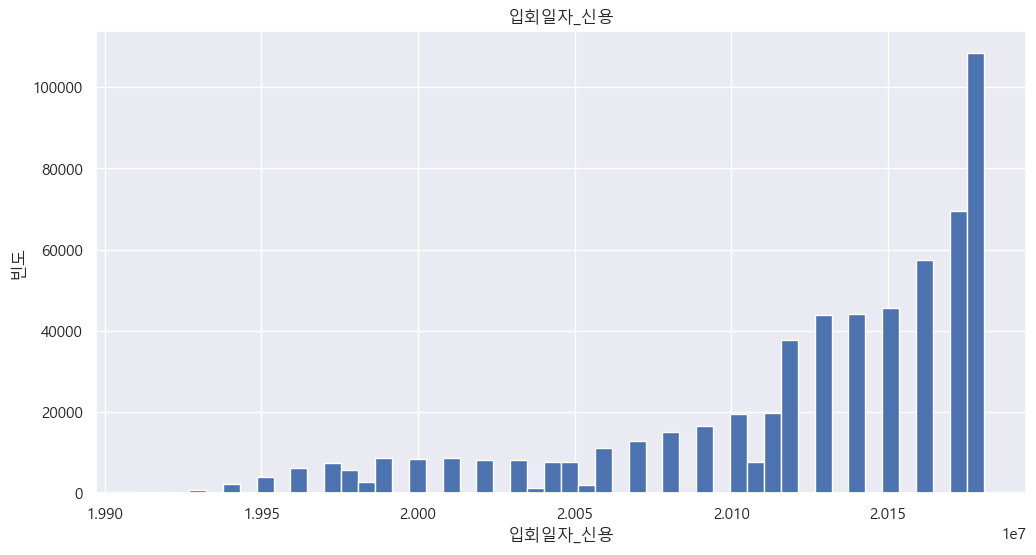

count      600000
mean     20122713
std         60364
min      19910701
25%      20100301
50%      20140701
75%      20170601
max      20180601
Name: 입회일자_신용, dtype: int64


<Axes: xlabel='입회일자_신용'>

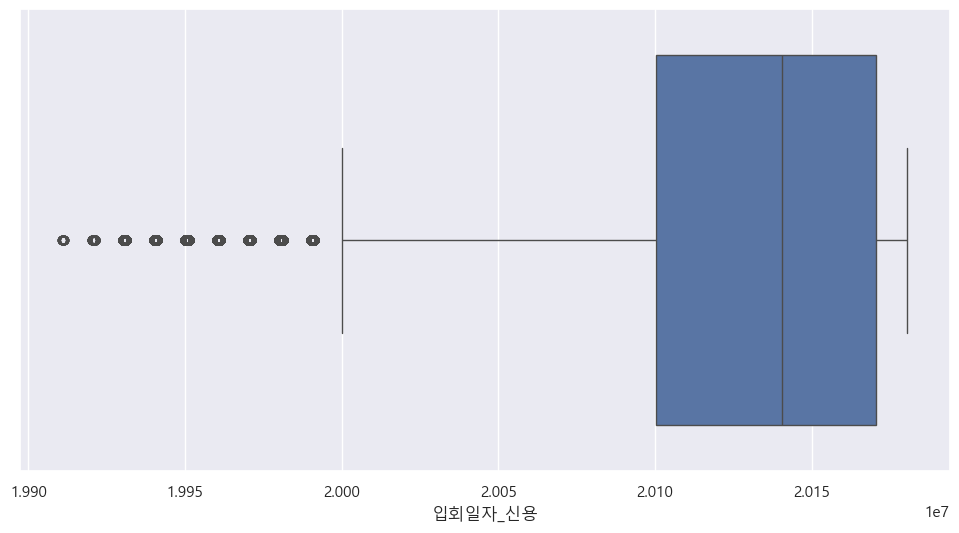

In [33]:
all_df['입회일자_신용'].hist(bins=50)
plt.xlabel('입회일자_신용')
plt.ylabel('빈도')
plt.title('입회일자_신용')
plt.show()

desc = all_df['입회일자_신용'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['입회일자_신용'])

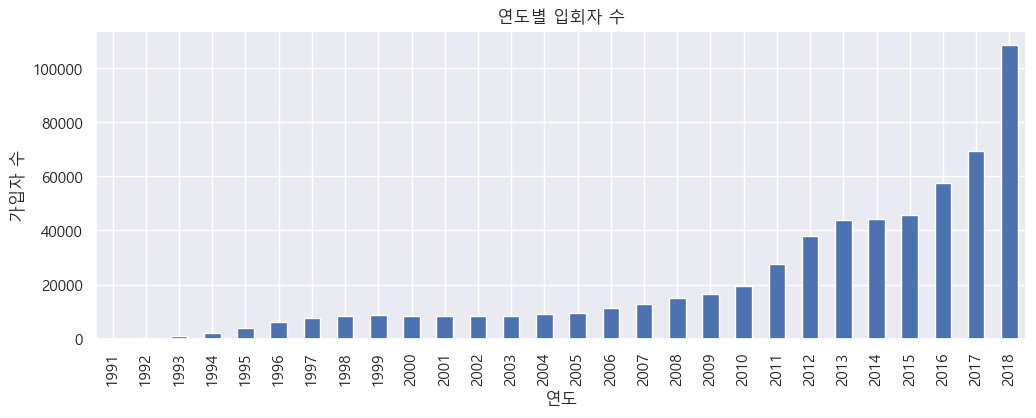

In [34]:
# 연도, 월 컬럼 추출
all_df['입회연도'] = all_df['입회일자_신용'] // 10000
all_df['입회월'] = (all_df['입회일자_신용'] % 10000) // 100

# 연도별 가입자 수
yearly_counts = all_df['입회연도'].value_counts().sort_index()
yearly_counts.plot(kind='bar', figsize=(12, 4))
plt.title('연도별 입회자 수')
plt.xlabel('연도')
plt.ylabel('가입자 수')
plt.show()

### 입회경과개월수_신용
- 신용카드를 소지한 이후 경과 개월 수

In [36]:
# 입회경과개월수_신용
all_df['입회경과개월수_신용'].value_counts()

입회경과개월수_신용
6      29992
5      16033
4      14975
3      13966
2      13002
       ...  
322        5
321        3
327        3
329        2
328        1
Name: count, Length: 328, dtype: int64

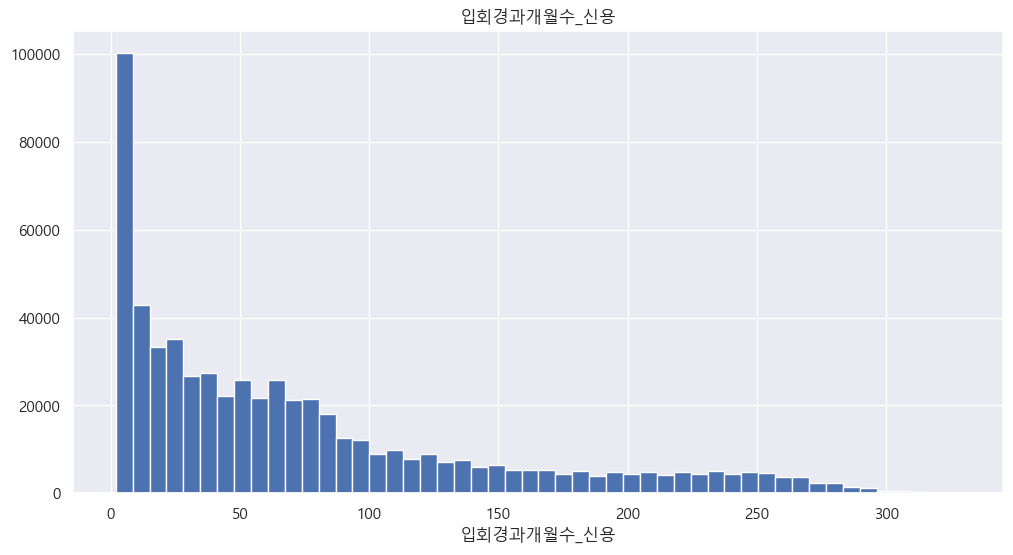

count    600000
mean         73
std          72
min           2
25%          17
50%          51
75%         103
max         329
Name: 입회경과개월수_신용, dtype: int64


<Axes: xlabel='입회경과개월수_신용'>

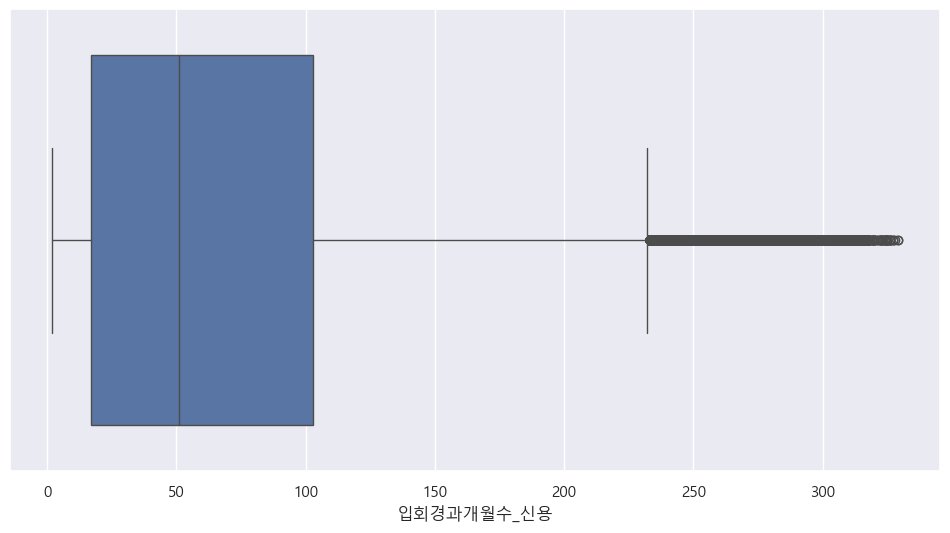

In [37]:
all_df['입회경과개월수_신용'].hist(bins=50)
plt.xlabel('입회경과개월수_신용')
plt.title('입회경과개월수_신용')
plt.show()

desc = all_df['입회경과개월수_신용'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['입회경과개월수_신용'])

### 회원여부_연체
- 연체 여부
- 0 / 1 로 구분
- 0 = 연체없음, 1 = 연체 있음
- 보통 카드사/금융사에서는 1이 위험 고객군(Risky)을 의미함

In [39]:
# 회원여부_연체
all_df['회원여부_연체'].value_counts()

회원여부_연체
0    589744
1     10256
Name: count, dtype: int64

### 이용거절여부_카드론
- 카드론 이용거절여부

In [41]:
# 카드론 이용거절여부
all_df['이용거절여부_카드론'].value_counts()

이용거절여부_카드론
0    480887
1    119113
Name: count, dtype: int64

### 동의여부_한도증액안내
- 한도증액안내 동의여부

In [43]:
# 동의여부_한도증액안내
all_df['동의여부_한도증액안내'].value_counts()

동의여부_한도증액안내
0    540696
1     59304
Name: count, dtype: int64

### 수신거부여부_TM
- TM 수신거부여부

In [45]:
# 수신거부여부_TM
all_df['수신거부여부_TM'].value_counts()

수신거부여부_TM
0    387581
1    212419
Name: count, dtype: int64

### 수신거부여부_DM
- DM 수신거부여부

In [47]:
# 수신거부여부_DM
all_df['수신거부여부_DM'].value_counts()

수신거부여부_DM
0    413141
1    186859
Name: count, dtype: int64

### 수신거부여부_메일
- 메일 수신거부여부

In [49]:
# 수신거부여부_메일
all_df['수신거부여부_메일'].value_counts()

수신거부여부_메일
0    409577
1    190423
Name: count, dtype: int64

### 수신거부여부_SMS
- SMS 수신거부여부

In [51]:
# 수신거부여부_SMS
all_df['수신거부여부_SMS'].value_counts(dropna=False)

수신거부여부_SMS
0    378883
1    221117
Name: count, dtype: int64

### 가입통신회사코드
- 가입한 통신사 구분 코드
- 결측치 존재 (16.18%)
- S사, K사, L사

In [53]:
all_df['가입통신회사코드'].value_counts(dropna=False)

가입통신회사코드
S사      247153
K사      142936
L사      112828
None     97083
Name: count, dtype: int64

In [54]:
na_count = all_df['가입통신회사코드'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 97083개 (16.18%)


### 탈회횟수_누적
- 누적 탈회횟수

In [56]:
all_df['탈회횟수_누적'].value_counts(dropna=False)

탈회횟수_누적
0    349801
1    190904
2     59295
Name: count, dtype: int64

<Axes: ylabel='count'>

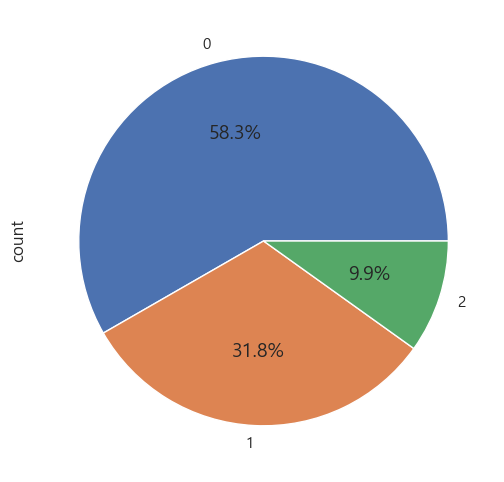

In [57]:
all_df['탈회횟수_누적'].value_counts().plot.pie(autopct='%.1f%%')

### 최종탈회후경과월
- 최종탈회 이후  경과 개월 수
- 0 개월이 가장 많음 : 방금 탈회했거나 이번 달 탈회한 사람들
- Max : 117 개월 -> 9년 9개월 경과

In [59]:
all_df['최종탈회후경과월'].value_counts(dropna=False)

최종탈회후경과월
0      351845
47      19018
46      18952
48      18357
45      16048
        ...  
116         4
40          4
91          3
90          2
117         1
Name: count, Length: 67, dtype: int64

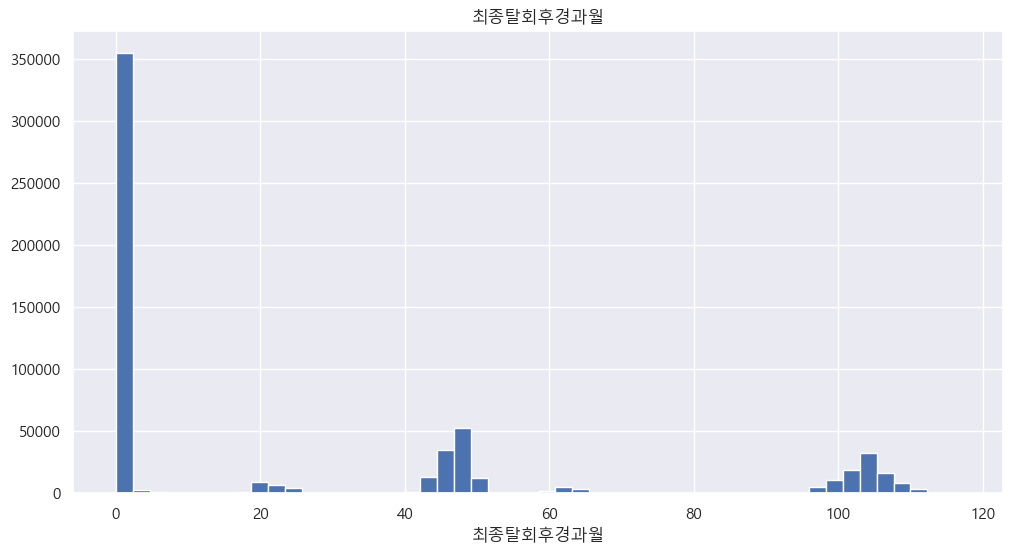

count    600000
mean         27
std          38
min           0
25%           0
50%           0
75%          48
max         117
Name: 최종탈회후경과월, dtype: int64


<Axes: xlabel='최종탈회후경과월'>

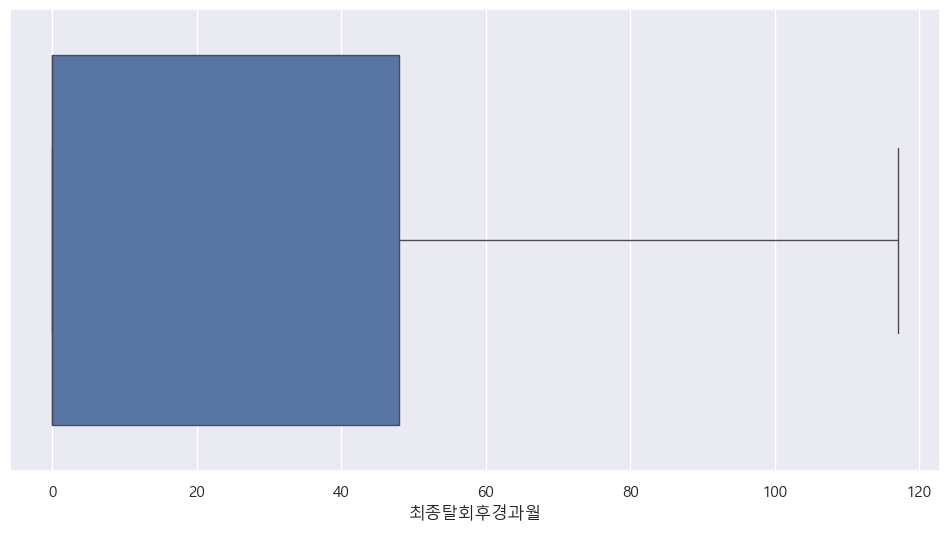

In [60]:
all_df['최종탈회후경과월'].hist(bins=50)
plt.xlabel('최종탈회후경과월')
plt.title('최종탈회후경과월')
plt.show()

desc = all_df['최종탈회후경과월'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['최종탈회후경과월'])

### 탈회횟수_발급6개월이내
- 발급6개월 이내 탈회 횟수
- 0 / 1 로 구분되어 있음.

In [62]:
all_df['탈회횟수_발급6개월이내'].value_counts(dropna=False)

탈회횟수_발급6개월이내
0    575735
1     24265
Name: count, dtype: int64

### 탈회횟수_발급1년이내
- 발급1년 이내 탈회 횟수
- 0 / 1 로 구분되어 있음

In [64]:
all_df['탈회횟수_발급1년이내'].value_counts(dropna=False)

탈회횟수_발급1년이내
0    561648
1     38352
Name: count, dtype: int64

### 거주시도명
- 17개 광역시도명
(서울, 부산, 대구, 인천, 광주, 대전, 울산, 세종, 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주)

In [66]:
all_df['거주시도명'].value_counts(dropna=False)


거주시도명
서울    173320
경기    163559
인천     39984
부산     37844
대전     35741
충북     27754
경남     23546
경북     23185
대구     19900
울산     17243
전남     13791
광주      9463
충남      7509
전북      3579
강원      2899
제주       638
세종        45
Name: count, dtype: int64

### 직장시도명
- 결측치 존재 (10.37%)

In [68]:
all_df['직장시도명'].value_counts(dropna=False)

직장시도명
경기      149122
서울      144290
None     62233
인천       36173
부산       33477
대전       30201
충북       25862
경남       23039
경북       21206
대구       18986
울산       16182
전남       13182
광주        8709
충남        6966
전북        5160
강원        3773
세종         778
제주         661
Name: count, dtype: int64

In [69]:
na_count = all_df['직장시도명'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 62233개 (10.37%)


### 마케팅동의여부
- 마케팅 동의 여부

In [71]:
all_df['직장시도명'].value_counts(dropna=False)

직장시도명
경기      149122
서울      144290
None     62233
인천       36173
부산       33477
대전       30201
충북       25862
경남       23039
경북       21206
대구       18986
울산       16182
전남       13182
광주        8709
충남        6966
전북        5160
강원        3773
세종         778
제주         661
Name: count, dtype: int64

### 유효카드수_신용체크
- 유효한 카드수 (신용체크)

In [73]:
all_df['유효카드수_신용체크'].value_counts(dropna=False)

유효카드수_신용체크
1    234064
2    177002
3    101676
4     50400
5     20028
0      7589
6      6613
7      2400
8       228
Name: count, dtype: int64

### 유효카드수_신용_가족

In [75]:
all_df['유효카드수_신용_가족'].value_counts(dropna=False)

유효카드수_신용_가족
0    583616
1     11604
2      4780
Name: count, dtype: int64

### 유효카드수_체크

In [77]:
all_df['유효카드수_체크'].value_counts(dropna=False)

유효카드수_체크
0    358408
1    164987
2     54731
3     21874
Name: count, dtype: int64

### 유효카드수_체크_가족

In [79]:
all_df['유효카드수_체크_가족'].value_counts(dropna=False)

유효카드수_체크_가족
0    599994
1         6
Name: count, dtype: int64

### 이용가능카드수_신용체크

In [81]:
all_df['이용가능카드수_신용체크'].value_counts(dropna=False)

이용가능카드수_신용체크
1    236242
2    172778
3     90396
4     45815
0     28173
5     18227
6      6001
7      2173
8       195
Name: count, dtype: int64

### 이용가능카드수_신용

In [83]:
all_df['이용가능카드수_신용'].value_counts(dropna=False)

이용가능카드수_신용
1    362172
2    120615
0     47568
3     43189
4     23052
5      3404
Name: count, dtype: int64

### 이용가능카드수_신용_가족

In [85]:
all_df['이용가능카드수_신용_가족'].value_counts(dropna=False)

이용가능카드수_신용_가족
0    583690
1     11541
2      4769
Name: count, dtype: int64

### 이용가능카드수_체크

In [87]:
all_df['이용가능카드수_체크'].value_counts(dropna=False)

이용가능카드수_체크
0    359088
1    165397
2     53981
3     21534
Name: count, dtype: int64

### 이용가능카드수_체크_가족

In [89]:
all_df['이용가능카드수_체크_가족'].value_counts(dropna=False)

이용가능카드수_체크_가족
0    599998
1         2
Name: count, dtype: int64

### 이용카드수_신용체크
- 이용 중인 카드수 (신용체크)

In [91]:
all_df['이용카드수_신용체크'].value_counts(dropna=False)

이용카드수_신용체크
1    282260
2    132778
0    109621
3     54539
4     18253
5      2464
6        85
Name: count, dtype: int64

### 이용카드수_신용

In [93]:
all_df['이용카드수_신용'].value_counts(dropna=False)

이용카드수_신용
1    312889
0    124571
2    112655
3     36543
4     13324
5        18
Name: count, dtype: int64

### 이용카드수_체크

In [95]:
all_df['이용카드수_체크'].value_counts(dropna=False)

이용카드수_체크
0    505743
1     92453
2      1804
Name: count, dtype: int64

### 이용카드수_체크_가족

In [97]:
all_df['이용카드수_체크_가족'].value_counts(dropna=False)

이용카드수_체크_가족
0    600000
Name: count, dtype: int64

### 이용금액_R3M_신용체크
- 이용금액 (최근3개월간)_신용체크
- 마이너스 값 존재, 어떻게 해석할것인가

In [99]:
all_df['이용금액_R3M_신용체크'].value_counts(dropna=False)

이용금액_R3M_신용체크
0         111780
4043          37
2705          37
2061          37
2929          36
           ...  
59091          1
83343          1
41358          1
104067         1
173263         1
Name: count, Length: 89329, dtype: int64

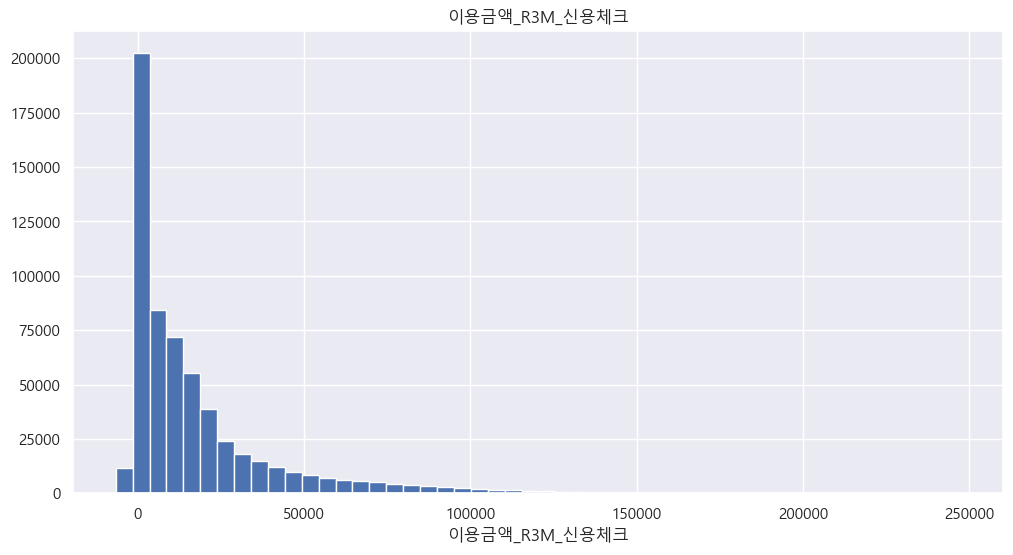

count    600000
mean      16900
std       23348
min       -6635
25%         361
50%        8730
75%       21685
max      247532
Name: 이용금액_R3M_신용체크, dtype: int64


<Axes: xlabel='이용금액_R3M_신용체크'>

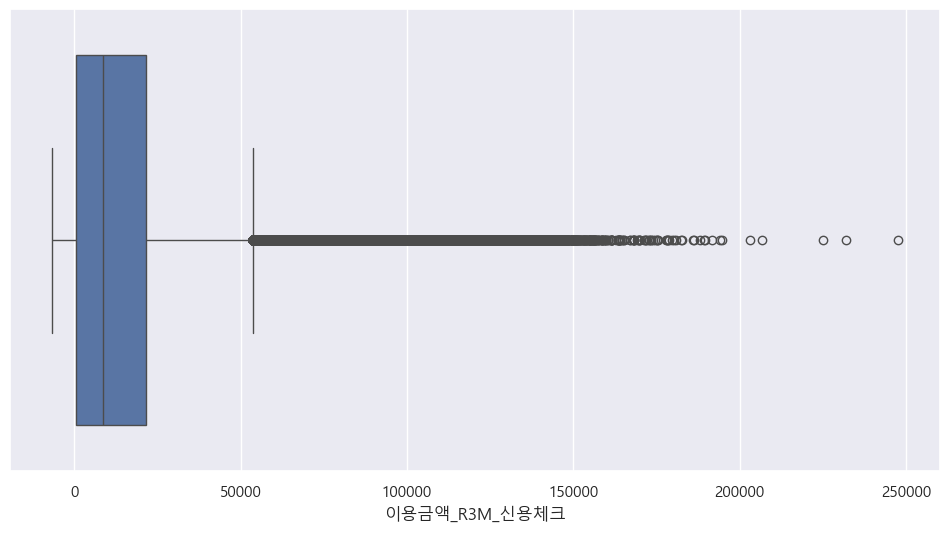

In [100]:
all_df['이용금액_R3M_신용체크'].hist(bins=50)
plt.xlabel('이용금액_R3M_신용체크')
plt.title('이용금액_R3M_신용체크')
plt.show()

desc = all_df['이용금액_R3M_신용체크'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['이용금액_R3M_신용체크'])

### 이용금액_R3M_신용
- 마이너스 값 존재함...

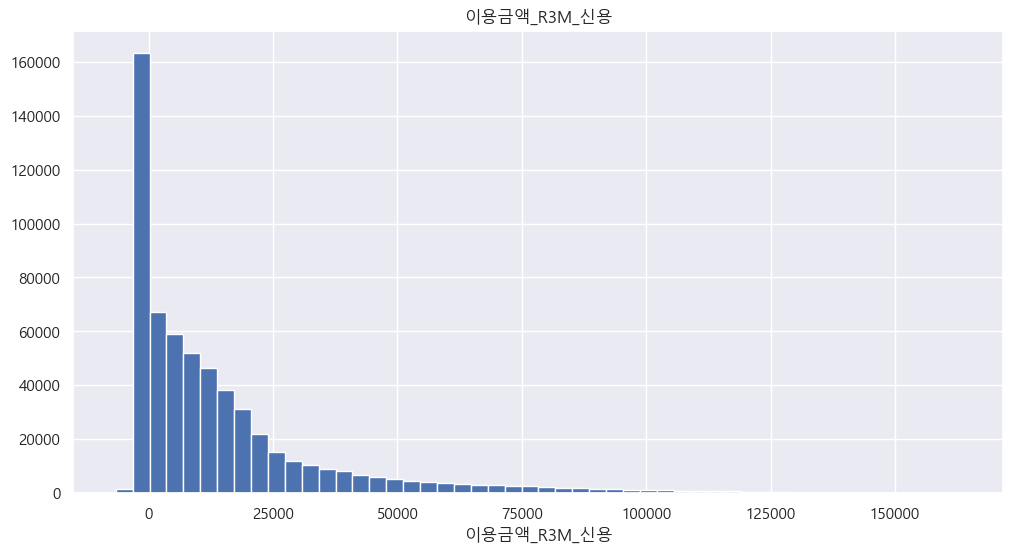

count    600000
mean      15247
std       21999
min       -6635
25%           0
50%        7542
75%       19490
max      163314
Name: 이용금액_R3M_신용, dtype: int64


<Axes: xlabel='이용금액_R3M_신용'>

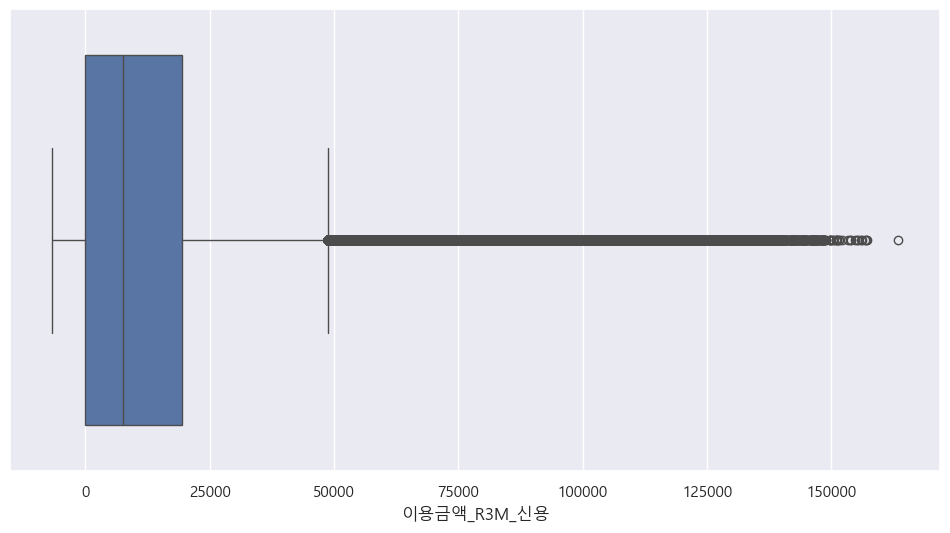

In [102]:
all_df['이용금액_R3M_신용'].hist(bins=50)
plt.xlabel('이용금액_R3M_신용')
plt.title('이용금액_R3M_신용')
plt.show()

desc = all_df['이용금액_R3M_신용'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['이용금액_R3M_신용'])

### 이용금액_R3M_신용_가족

In [104]:
all_df['이용금액_R3M_신용체크'].value_counts(dropna=False)

이용금액_R3M_신용체크
0         111780
4043          37
2705          37
2061          37
2929          36
           ...  
59091          1
83343          1
41358          1
104067         1
173263         1
Name: count, Length: 89329, dtype: int64

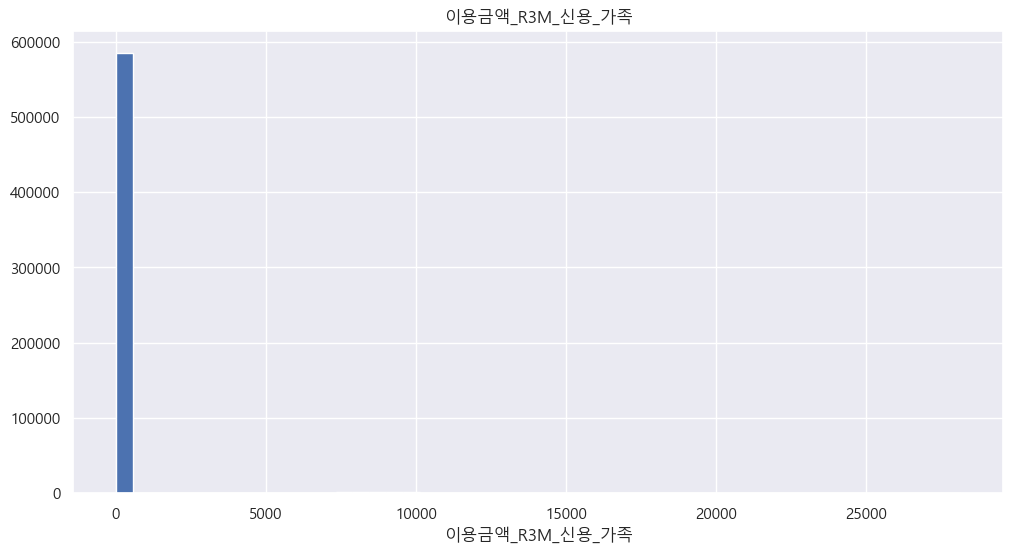

count    600000
mean        270
std        1734
min           0
25%           0
50%           0
75%           0
max       28159
Name: 이용금액_R3M_신용_가족, dtype: int64


<Axes: xlabel='이용금액_R3M_신용_가족'>

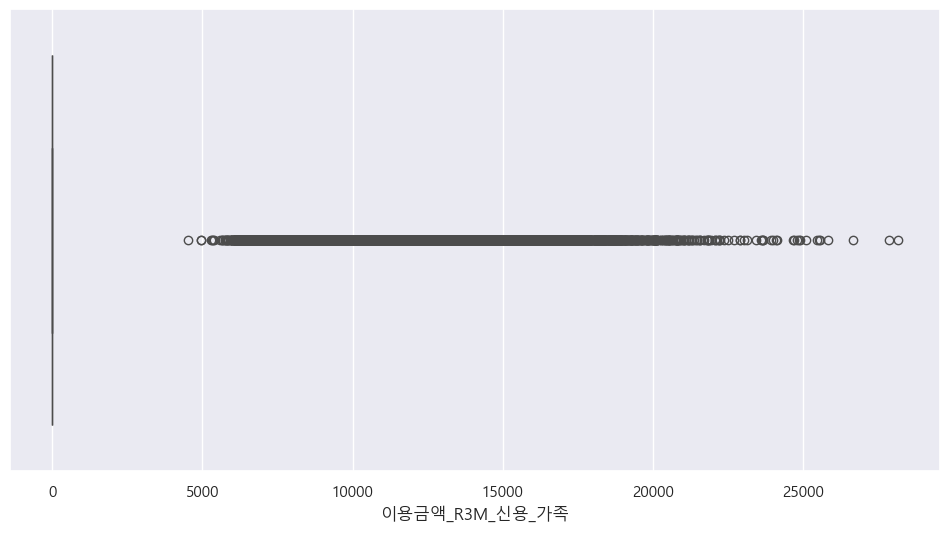

In [105]:
all_df['이용금액_R3M_신용_가족'].hist(bins=50)
plt.xlabel('이용금액_R3M_신용_가족')
plt.title('이용금액_R3M_신용_가족')
plt.show()

desc = all_df['이용금액_R3M_신용_가족'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['이용금액_R3M_신용_가족'])

### 이용금액_R3M_체크

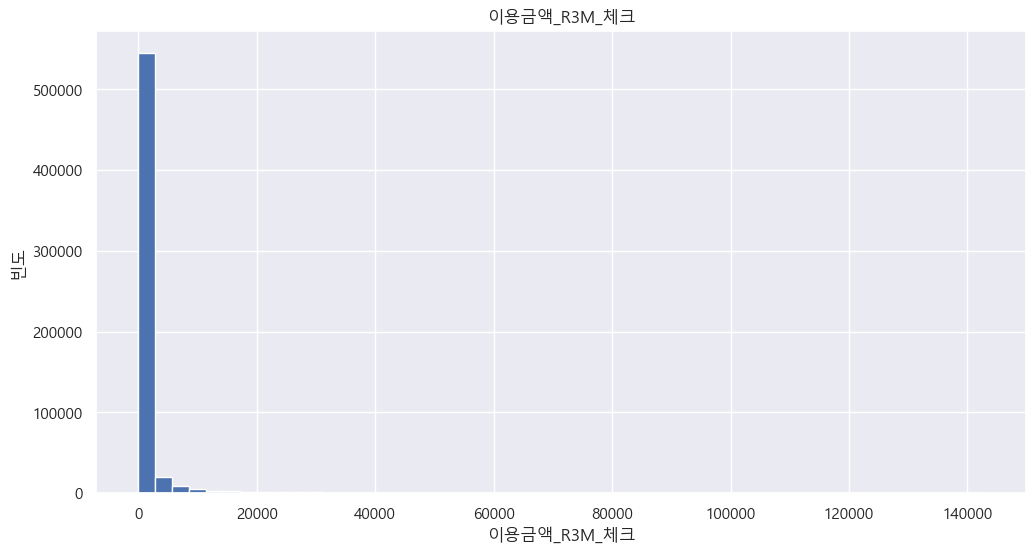

count    600000
mean       1653
std        7567
min           0
25%           0
50%           0
75%           0
max      142752
Name: 이용금액_R3M_체크, dtype: int64


<Axes: xlabel='이용금액_R3M_체크'>

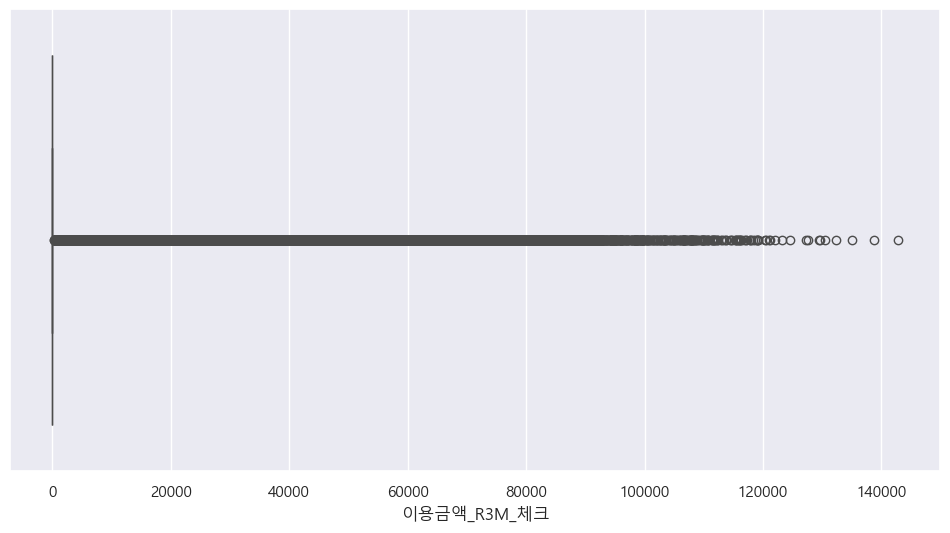

In [107]:
all_df['이용금액_R3M_체크'].hist(bins=50)
plt.xlabel('이용금액_R3M_체크')
plt.ylabel('빈도')
plt.title('이용금액_R3M_체크')
plt.show()

desc = all_df['이용금액_R3M_체크'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['이용금액_R3M_체크'])

### 이용금액_R3M_체크_가족
- 전부 0원

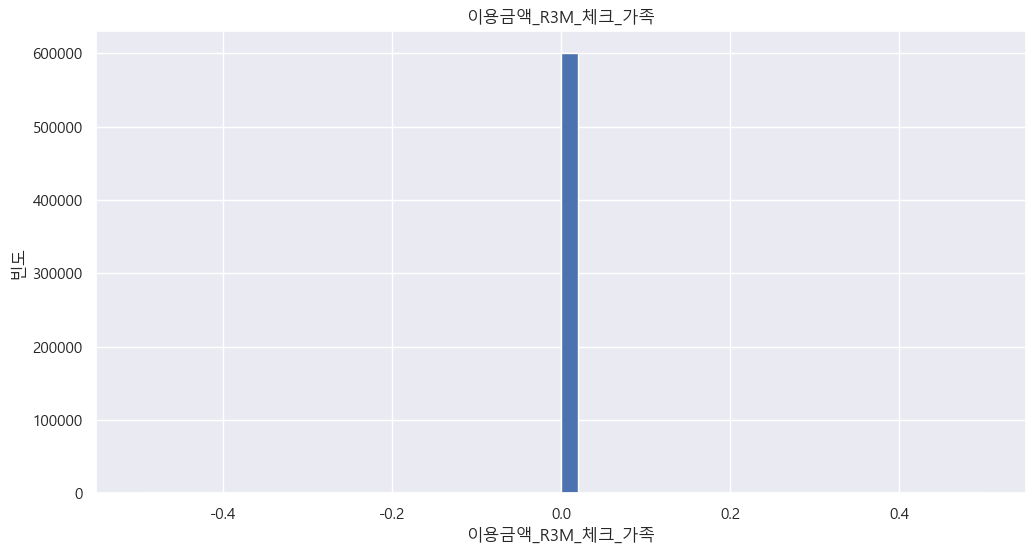

count    600000
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max           0
Name: 이용금액_R3M_체크_가족, dtype: int64


<Axes: xlabel='이용금액_R3M_체크_가족'>

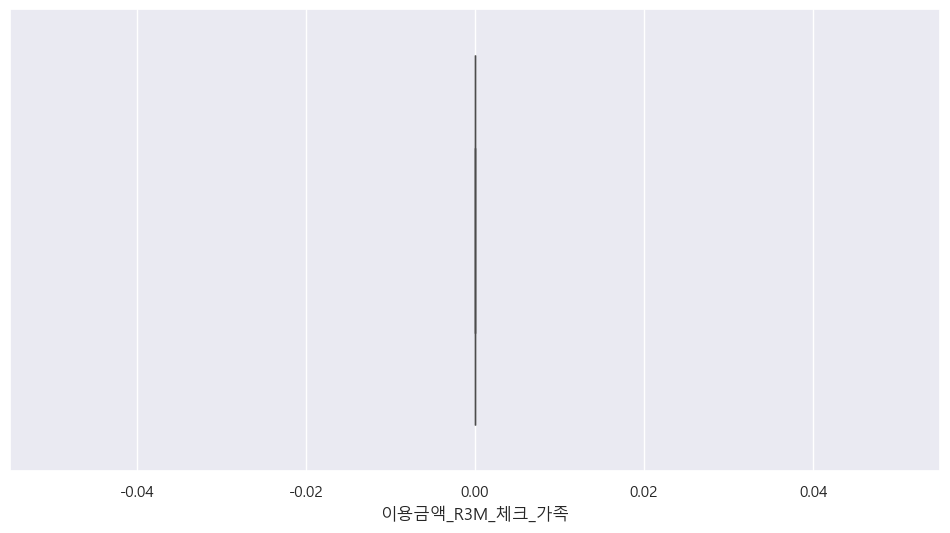

In [109]:
all_df['이용금액_R3M_체크_가족'].hist(bins=50)
plt.xlabel('이용금액_R3M_체크_가족')
plt.ylabel('빈도')
plt.title('이용금액_R3M_체크_가족')
plt.show()

desc = all_df['이용금액_R3M_체크_가족'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['이용금액_R3M_체크_가족'])

In [110]:
all_df['이용금액_R3M_체크_가족'].value_counts()

이용금액_R3M_체크_가족
0    600000
Name: count, dtype: int64

### _1순위카드이용금액
- 1순위 이용 카드의 이용금액
- 마이더스 금액이 존재함...

In [112]:
all_df['_1순위카드이용금액'].value_counts()

_1순위카드이용금액
0        124267
1284         52
363          48
3563         45
166          44
          ...  
43897         1
47728         1
58168         1
84912         1
87203         1
Name: count, Length: 61936, dtype: int64

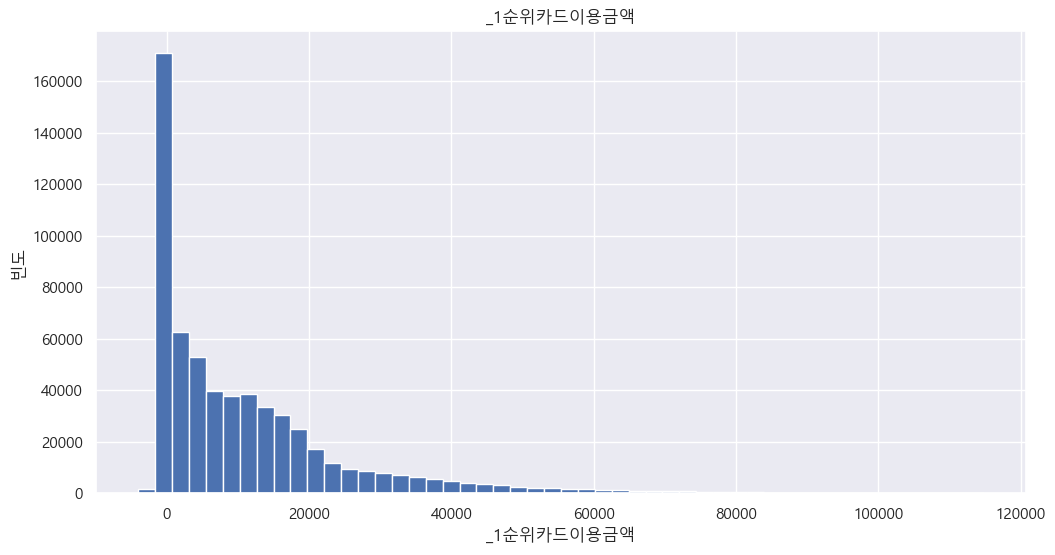

count    600000
mean      11011
std       14162
min       -4014
25%           0
50%        6152
75%       15963
max      114813
Name: _1순위카드이용금액, dtype: int64


<Axes: xlabel='_1순위카드이용금액'>

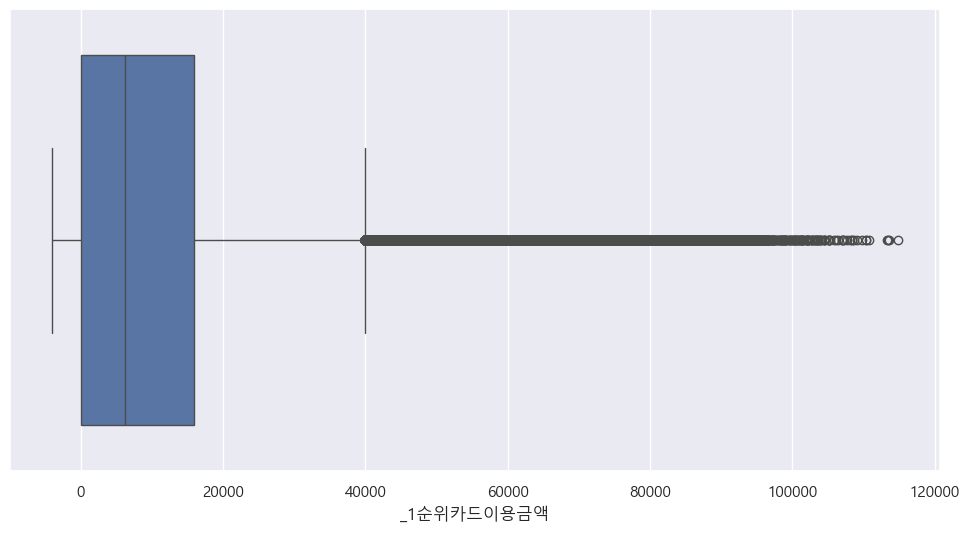

In [113]:
all_df['_1순위카드이용금액'].hist(bins=50)
plt.xlabel('_1순위카드이용금액')
plt.ylabel('빈도')
plt.title('_1순위카드이용금액')
plt.show()

desc = all_df['_1순위카드이용금액'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['_1순위카드이용금액'])

### _1순위카드이용건수
- 1순위 이용 카드의 이용 건수
- 이용 건수에 마이너스가 있을 수 있나 ? 어떤 의미인가 ?
- -2, -1의 의미는 ??

In [115]:
all_df['_1순위카드이용건수'].value_counts()

_1순위카드이용건수
-2      106253
-1       16927
 0       16316
 1       15960
 2       14895
         ...  
 220        13
 221         8
 222         1
 223         1
 224         1
Name: count, Length: 227, dtype: int64

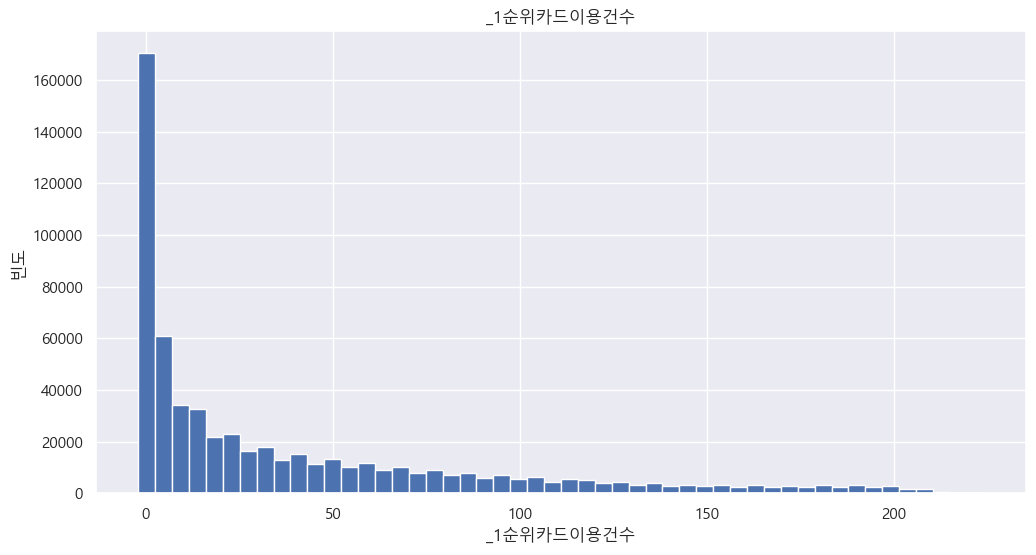

count    600000
mean         39
std          51
min          -2
25%           1
50%          17
75%          61
max         224
Name: _1순위카드이용건수, dtype: int64


<Axes: xlabel='_1순위카드이용건수'>

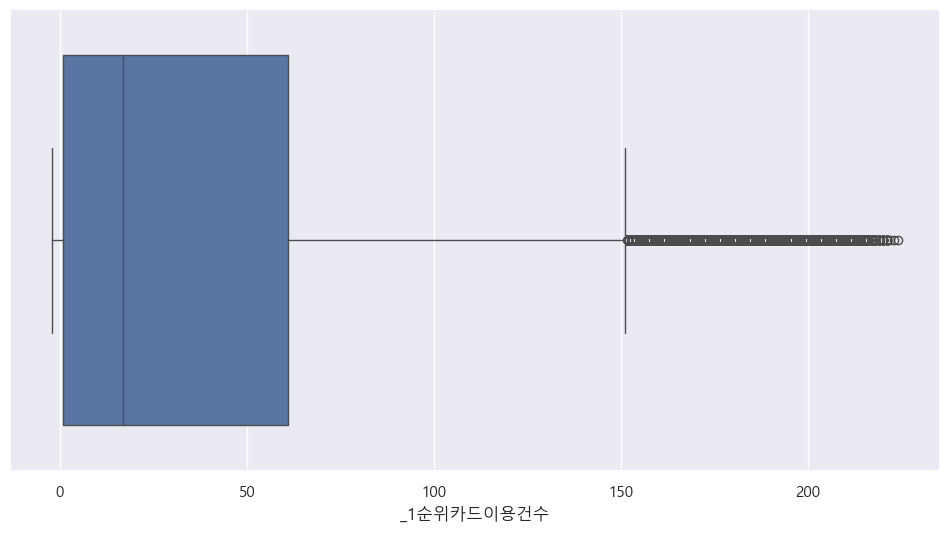

In [116]:
all_df['_1순위카드이용건수'].hist(bins=50)
plt.xlabel('_1순위카드이용건수')
plt.ylabel('빈도')
plt.title('_1순위카드이용건수')
plt.show()

desc = all_df['_1순위카드이용건수'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['_1순위카드이용건수'])

### _1순위신용체크구분
- 1순위 이용 카드의 신용,체크 구분
- 신용 / 체크 로 구분되어 있음
- 결측치 존재함 (1.21%)

In [118]:
all_df['_1순위신용체크구분'].value_counts(dropna=False)

_1순위신용체크구분
신용      572976
체크       19793
None      7231
Name: count, dtype: int64

In [119]:
na_count = all_df['_1순위신용체크구분'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 7231개 (1.21%)


### _2순위카드 이용금액
- 마이너스 이용금액 존재함.

In [121]:
all_df['_2순위카드이용금액'].value_counts(dropna=False)

_2순위카드이용금액
0        430350
5742         27
3526         26
4135         26
3816         25
          ...  
39338         1
24108         1
22978         1
21517         1
31916         1
Name: count, Length: 37941, dtype: int64

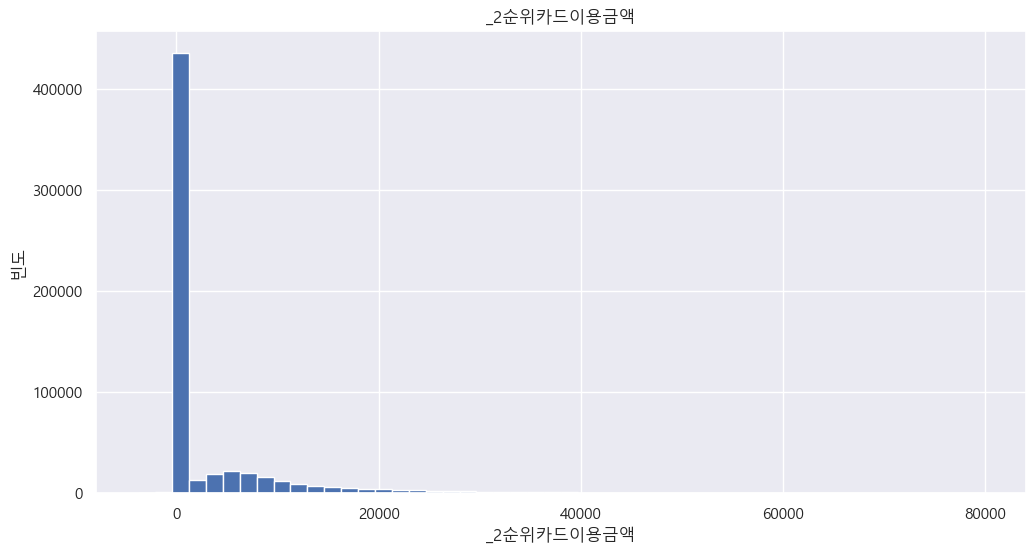

count    600000
mean       3342
std        7727
min       -3777
25%           0
50%           0
75%        2988
max       79838
Name: _2순위카드이용금액, dtype: int64


<Axes: xlabel='_2순위카드이용금액'>

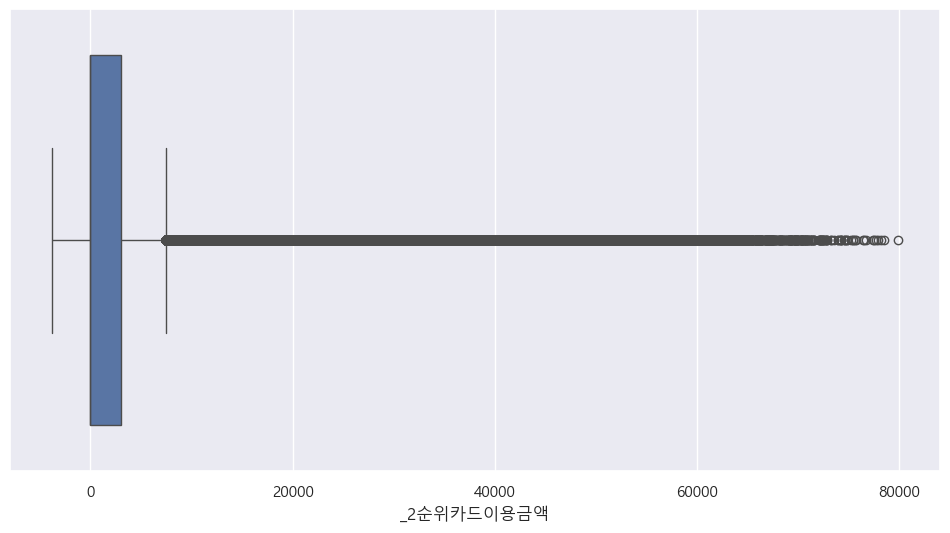

In [122]:
all_df['_2순위카드이용금액'].hist(bins=50)
plt.xlabel('_2순위카드이용금액')
plt.ylabel('빈도')
plt.title('_2순위카드이용금액')
plt.show()

desc = all_df['_2순위카드이용금액'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['_2순위카드이용금액'])

### _2순위카드이용건수
- 이용건수에 마이너스 값 있음...

In [124]:
all_df['_2순위카드이용건수'].value_counts(dropna=False)

_2순위카드이용건수
0      430650
27       3130
29       3090
26       3050
28       3024
        ...  
199         2
202         1
203         1
201         1
198         1
Name: count, Length: 205, dtype: int64

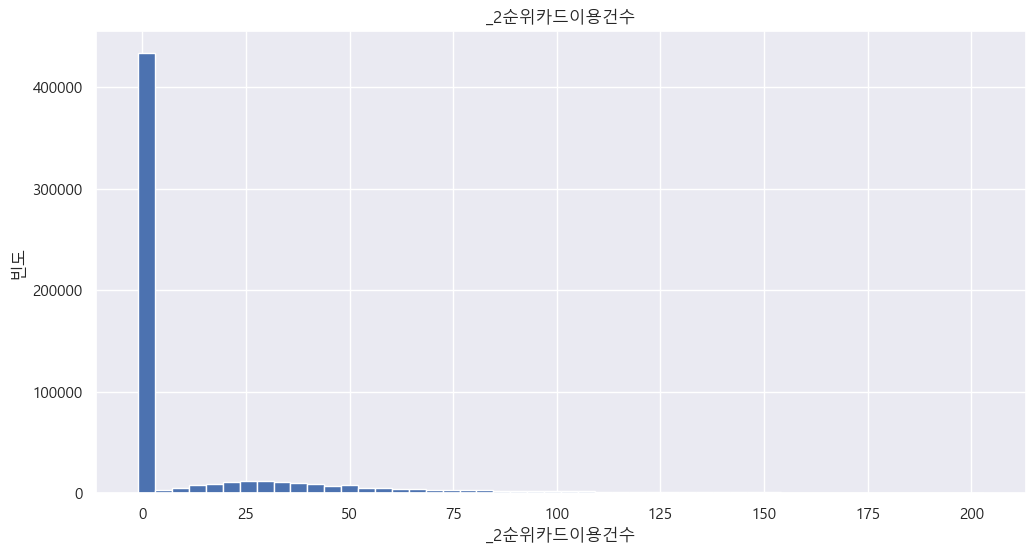

count    600000
mean         14
std          29
min          -1
25%           0
50%           0
75%          15
max         203
Name: _2순위카드이용건수, dtype: int64


<Axes: xlabel='_2순위카드이용건수'>

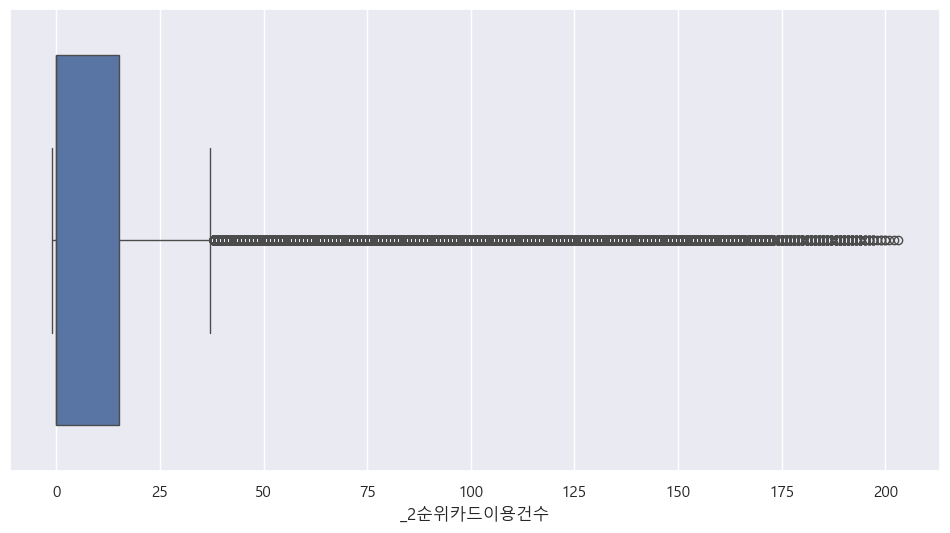

In [125]:
all_df['_2순위카드이용건수'].hist(bins=50)
plt.xlabel('_2순위카드이용건수')
plt.ylabel('빈도')
plt.title('_2순위카드이용건수')
plt.show()

desc = all_df['_2순위카드이용건수'].describe()
print(desc.apply(lambda x: int(x)))

# 이상치 탐색
sns.boxplot(x=all_df['_2순위카드이용건수'])

### _2순위신용체크구분
- 신용 / 체크로 구분되어 있음

- 결측치 존재 (39.98 %)

In [127]:
all_df['_2순위신용체크구분'].value_counts(dropna=False)

_2순위신용체크구분
None    239888
신용      217100
체크      143012
Name: count, dtype: int64

In [128]:
na_count = all_df['_2순위신용체크구분'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 239888개 (39.98%)


### 최종유효년월_신용_이용가능
- 이용가능한 신용카드의 최종 유효년월
- 결측치 <Na> 문자열로 존재함.
- 8.86 %

In [130]:
all_df['최종유효년월_신용_이용가능'].value_counts(dropna=False)

최종유효년월_신용_이용가능
NaN         53149
202208.0    16959
202210.0    16626
202207.0    16535
202209.0    16399
            ...  
201810.0       33
201809.0       16
201808.0        2
201807.0        2
201806.0        1
Name: count, Length: 74, dtype: int64

In [131]:
# 실제로 '<NA>' 값이 문자열인지 확인
all_df['최종유효년월_신용_이용가능'].unique()[:10]

array([201905., 202108., 202303., 202302., 202307.,     nan, 202102.,
       202212., 202203., 202107.])

In [132]:
# 문자열 '<NA>'를 진짜 결측치로 바꾸기
all_df['최종유효년월_신용_이용가능'] = all_df['최종유효년월_신용_이용가능'].replace('<NA>', pd.NA)

In [133]:
na_count = all_df['최종유효년월_신용_이용가능'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 53149개 (8.86%)


### 최종유효년월_신용_이용
- 이용중인 신용카드의 최종 유효년월
- 결측치 존재 (22.47%)

In [135]:
all_df['최종유효년월_신용_이용'].value_counts(dropna=False)

최종유효년월_신용_이용
NaN         134817
202207.0     15683
202208.0     15529
202210.0     15416
202205.0     15104
             ...  
201901.0        52
201812.0        17
201811.0         7
201810.0         3
201809.0         1
Name: count, Length: 71, dtype: int64

In [136]:
na_count = all_df['최종유효년월_신용_이용'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 134817개 (22.47%)


### 최종카드발급일자
- 최종 발급받은 카드의 발급일자
- 결측치 존재 (1.81%)

In [138]:
all_df['최종카드발급일자'].value_counts(dropna=False)

최종카드발급일자
NaN           10854
20180701.0     1068
20180707.0     1009
20180703.0     1006
20180711.0      975
              ...  
20131015.0        6
20131214.0        6
20131208.0        6
20131217.0        6
20131117.0        6
Name: count, Length: 1886, dtype: int64

In [139]:
na_count = all_df['최종카드발급일자'].isna().sum()
total_count = len(all_df)
print(f"결측치 개수: {na_count}개 ({na_count / total_count:.2%})")

결측치 개수: 10854개 (1.81%)


### 보유여부_해외겸용_본인
- 해외겸용 카드 보유 여부

In [141]:
all_df['보유여부_해외겸용_본인'].value_counts(dropna=False)

보유여부_해외겸용_본인
1    467819
0    132181
Name: count, dtype: int64

### 이용가능여부_해외겸용_본인

In [143]:
all_df['이용가능여부_해외겸용_본인'].value_counts(dropna=False)

이용가능여부_해외겸용_본인
1    451005
0    148995
Name: count, dtype: int64

### 이용여부_3M_해외겸용_본인
- 해외겸용 신용카드 최근3개월 이용 여부

In [145]:
all_df['이용여부_3M_해외겸용_본인'].value_counts(dropna=False)

이용여부_3M_해외겸용_본인
1    361739
0    238261
Name: count, dtype: int64

### 연회비발생카드수_BOM
- 연회비발생카드수(당월)
- 0개 / 1개이상

In [147]:
all_df['연회비발생카드수_B0M'].value_counts(dropna=False)

연회비발생카드수_B0M
0개      598803
1개이상      1197
Name: count, dtype: int64

### 연회비할인카드수_BOM
- 연회비할인카드수(당월)
- 전부 0 장

In [149]:
all_df['연회비할인카드수_B0M'].value_counts(dropna=False)

연회비할인카드수_B0M
0    600000
Name: count, dtype: int64

### 기본연회비_BOM
- 기본연회비(당월)

In [151]:
all_df['기본연회비_B0M'].value_counts(dropna=False)

기본연회비_B0M
0      599305
108       225
109       146
107       129
50         93
106        35
105        20
110        14
104        14
49         12
103         6
101         1
Name: count, dtype: int64

### 제휴연회비_BOM
- 제휴연회비(당월)

In [153]:
all_df['제휴연회비_B0M'].value_counts(dropna=False)

제휴연회비_B0M
0      599802
949       104
950        92
951         1
150         1
Name: count, dtype: int64

### 할인금액_기본연회비_BOM
- 전부 0

In [155]:
all_df['할인금액_기본연회비_B0M'].value_counts()

할인금액_기본연회비_B0M
0    600000
Name: count, dtype: int64

### 할인금액_제휴연회비_BOM
- 전부 0

In [157]:
all_df['할인금액_제휴연회비_B0M'].value_counts()

할인금액_제휴연회비_B0M
0    600000
Name: count, dtype: int64

### 청구금액_기본연회비_BOM

In [159]:
all_df['청구금액_기본연회비_B0M'].value_counts()

청구금액_기본연회비_B0M
0      599305
108       225
109       146
107       129
50         93
106        35
105        20
110        14
104        14
49         12
103         6
101         1
Name: count, dtype: int64

### 청구금액_제휴연회비_BOM

In [161]:
all_df['청구금액_제휴연회비_B0M'].value_counts()


청구금액_제휴연회비_B0M
0      599802
949       104
950        92
951         1
150         1
Name: count, dtype: int64

### 상품관련면제카드수_BOM
- 전부 0개

In [163]:
all_df['상품관련면제카드수_B0M'].value_counts()

상품관련면제카드수_B0M
0개    600000
Name: count, dtype: int64

### 임직원면제카드수_BOM
- 전부 0개

In [165]:
all_df['임직원면제카드수_B0M'].value_counts()

임직원면제카드수_B0M
0개    600000
Name: count, dtype: int64

### 우수회원면제카드수_BOM
- 전부 0개

In [167]:
all_df['우수회원면제카드수_B0M'].value_counts()

우수회원면제카드수_B0M
0개    600000
Name: count, dtype: int64

### 기타면제카드수_BOM

In [169]:
all_df['기타면제카드수_B0M'].value_counts()

기타면제카드수_B0M
0개    600000
Name: count, dtype: int64

### 카드신청건수
- 0건, 1건

In [171]:
all_df['카드신청건수'].value_counts()

카드신청건수
0    547474
1     52526
Name: count, dtype: int64

### Life_Stage
- 생애주기 구분
- 자녀성장(1) / 자녀성장(2) / 자녀출산기 / 가족구축기 / 노년생활 / 자녀독립기 / 독신

In [173]:
all_df['Life_Stage'].value_counts(dropna=False)

Life_Stage
자녀성장(1)    199094
자녀성장(2)    147490
자녀출산기       62059
가족구축기       60986
노년생활        59084
자녀독립기       49144
독신          22143
Name: count, dtype: int64

### 최종카드발급경과일

In [175]:
all_df['최종카드발급경과월'].value_counts()

최종카드발급경과월
0     19767
14    18517
13    18448
15    18307
12    18250
      ...  
61       44
62       17
63        6
64        2
65        1
Name: count, Length: 66, dtype: int64

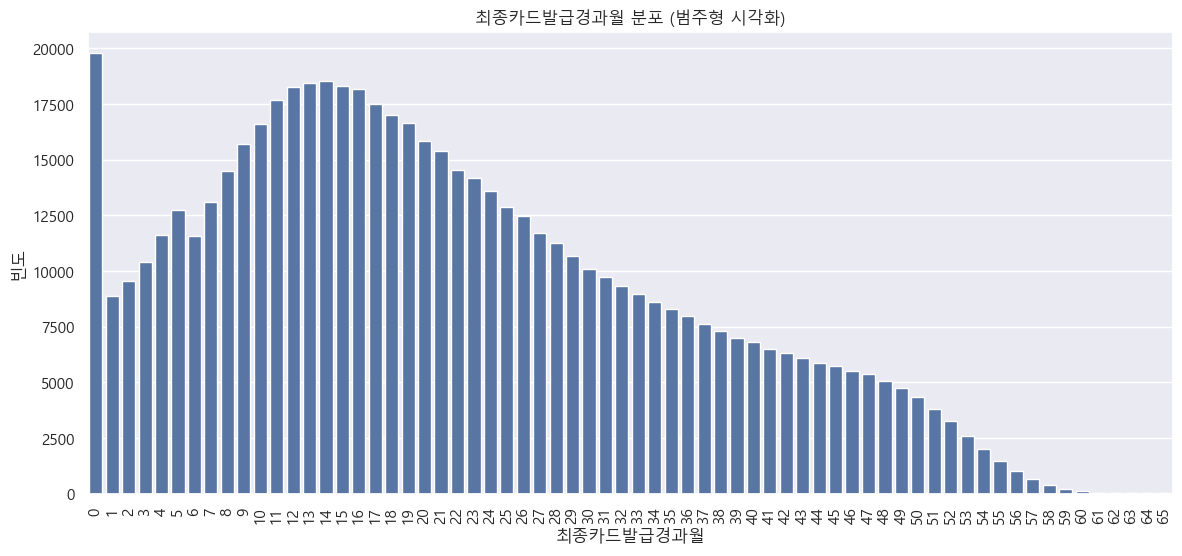

In [176]:
# 값 개수 정렬
cnts = all_df['최종카드발급경과월'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(x=cnts.index, y=cnts.values)
plt.xticks(rotation=90)
plt.xlabel('최종카드발급경과월')
plt.ylabel('빈도')
plt.title('최종카드발급경과월 분포 (범주형 시각화)')
plt.show()

In [177]:
all_df['최종카드발급경과월'].describe()

count    600000.000000
mean         21.418478
std          13.767574
min           0.000000
25%          11.000000
50%          19.000000
75%          31.000000
max          65.000000
Name: 최종카드발급경과월, dtype: float64

In [15]:
all_df.to_csv('open/test_1.회원정보.csv', index=False)